**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset**

In [ ]:
df = pd.read_csv("/content/Hiring_Challenge.csv")

In [ ]:
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,0


**About the data:**
15 features (C1 - C15), target: Hired_Flag (1/0)

**Mixed types:**

Categorical: C1, C4, C5, C6, C7, C9, C10, C12, C13

Continuous: C2, C3, C8, C11, C14, C15


fields included are:  
C1: b, a.  
C2: continuous.  
C3: continuous.  
C4: u, y, l, t.  
C5: g, p, gg.  
C6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.  
C7: v, h, bb, j, n, z, dd, ff, o.  
C8: continuous.  
C9: t, f.  
C10: t, f.  
C11: continuous.  
C12: t, f.  
C13: g, p, s.  
C14: continuous.  
C15: continuous.  
Hired Flag: 1,0  

In [ ]:
f"Total number of candidates are {len(df)}"

'Total number of candidates are 690'

In [ ]:
df.shape

(690, 16)

**Understanding the Categorical Features**

In [ ]:
df['C1'].value_counts()

,count
C1,
b,468
a,210
?,12


There should be only 2 types in C1. but its showing 2.now we can either replace the ? with mode or we can drop it

In [ ]:
# Treat "?" as missing values
#df['C1'] = df['C1'].replace('?', pd.NA)
# Replace "?" with NaN across all columns
df = df.replace('?', np.nan)

# Check how many missing
print("Missing values in C1:", df['C1'].isna().sum())

Missing values in C1: 12


In [ ]:
# Option 1: Drop missing values
#df = df.dropna(subset=['C1'])

# Option 2: Impute with mode (most frequent value)
mode_value = df['C1'].mode()[0]  #  'b'
df['C1'] = df['C1'].fillna(mode_value)

In [ ]:
df['C4'].value_counts()

,count
C4,
u,519
y,163
l,2


In [ ]:
df['C4'].isna().sum()

np.int64(0)

In [ ]:
mode_value = df['C4'].mode()[0]
df['C4'] = df['C4'].fillna(mode_value)

In [ ]:
df['C5'].value_counts()

,count
C5,
g,519
p,163
gg,2


In [ ]:
df['C5'].isna().sum()

np.int64(6)

In [ ]:
mode_value = df['C5'].mode()[0]
df['C5'] = df['C5'].fillna(mode_value)

In [ ]:
df['C6'].value_counts()

,count
C6,
c,137
q,78
w,64
i,59
aa,54
ff,53
k,51
cc,41
x,38


In [ ]:
df['C6'].isna().sum()

np.int64(9)

In [ ]:
mode_value = df['C6'].mode()[0]
df['C6'] = df['C6'].fillna(mode_value)

In [ ]:
df['C7'].value_counts()

,count
C7,
v,399
h,138
bb,59
ff,57
j,8
z,8
dd,6
n,4
o,2


In [ ]:
df['C7'].isna().sum()

np.int64(9)

In [ ]:
mode_value = df['C7'].mode()[0]
df['C7'] = df['C7'].fillna(mode_value)

In [ ]:
df['C9'].value_counts()

,count
C9,
t,361
f,329


In [ ]:
df['C10'].value_counts()

,count
C10,
f,395
t,295


In [ ]:
df['C12'].value_counts()

,count
C12,
f,374
t,316


In [ ]:
df['C13'].value_counts()

,count
C13,
g,625
s,57
p,8


**Understanding the continuous Features**

Converting the columns "C2,C3,C8" as float,others into integer values

In [ ]:
# Convert specific columns to float
continuous_cols = ['C2', 'C3', 'C8','C11', 'C14', 'C15']
df[continuous_cols] = df[continuous_cols].astype(float)

In [ ]:
# Convert specific columns to int
int_col = ['Hired']
df[int_col] = df[int_col].astype(int)

Checking For NULL values

In [ ]:
# Check missing values in continuous columns
continuous_cols = ['C2', 'C3', 'C8', 'C11', 'C14', 'C15']
print(df[continuous_cols].isna().sum())

C2     12
C3      0
C8      0
C11     0
C14    13
C15     0
dtype: int64


There are NULL values in Columns C2 and C14. **Data Imputation** for **C2** and **C14** Using **Median**

In [ ]:
continuous_cols = ['C2','C14']
for col in continuous_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

/tmp/ipython-input-71-4110579265.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [ ]:
print(df[continuous_cols].isna().sum())

C2     0
C14    0
dtype: int64


There are no NULL values now

In [ ]:
continuous_cols = ['C2', 'C3', 'C8', 'C11', 'C14', 'C15']

for col in continuous_cols:
    print(f"{col} → Min: {df[col].min()} | Max: {df[col].max()} | Mean: {df[col].mean()} | Median: {df[col].median()} | Std: {df[col].std()} | Variance: {df[col].var()}")


C2 → Min: 13.75 | Max: 80.25 | Mean: 31.514115942028983 | Median: 28.46 | Std: 11.860244756156707 | Variance: 140.66540567594265
C3 → Min: 0.0 | Max: 28.0 | Mean: 4.758724637681159 | Median: 2.75 | Std: 4.978163248528541 | Variance: 24.78210932900024
C8 → Min: 0.0 | Max: 28.5 | Mean: 2.223405797101449 | Median: 1.0 | Std: 3.3465133592781333 | Variance: 11.199151663827017
C11 → Min: 0.0 | Max: 67.0 | Mean: 2.4 | Median: 0.0 | Std: 4.862940034226996 | Variance: 23.648185776487665
C14 → Min: 0.0 | Max: 2000.0 | Mean: 183.5623188405797 | Median: 160.0 | Std: 172.19027776442283 | Variance: 29649.491756589086
C15 → Min: 0.0 | Max: 100000.0 | Mean: 1017.3855072463768 | Median: 5.0 | Std: 5210.1025983026975 | Variance: 27145169.084840517


**C2** -> Min: 13.75 | Max: 80.25 | Mean: 31.5206 | Median: 28.375 | Std: 11.9194 | Variance: 142.071

**Inference**: Mean (31.52) is slightly higher than median (28.38), indicating a mild right skew. Spread is moderate; no extreme outliers.

**C3** -> Min: 0.0 | Max: 28.0 | Mean: 4.7894 | Median: 2.855 | Std: 4.9954 | Variance: 24.954

**Inference**: Mean (4.79) > median (2.86) shows a right skew. Most candidates have low values, with a few much higher values pulling up the mean.

**C8** ->Min: 0.0 | Max: 28.5 | Mean: 2.2421 | Median: 1.0 | Std: 3.3673 | Variance: 11.339

**Inference**: Mean (2.24) > median (1.0); highly right-skewed. Many candidates have very low values; a small number have high ones.

**C11** -> Min: 0.0 | Max: 67.0 | Mean: 2.4366 | Median: 0.0 | Std: 4.8973 | Variance: 23.983

**Inference**: Median is 0 while mean is 2.44, meaning majority of values are 0, with a few high outliers shifting the mean upward (strong right skew).

**C14** -> Min: 0.0 | Max: 2000.0 | Mean: 181.6283 | Median: 160.0 | Std: 169.1842 | Variance: 28623.309

**Inference**: Mean (181.63) > median (160); moderate right skew with wide variability. Some large values push the mean up.

**C15** -> Min: 0.0 | Max: 100000.0 | Mean: 1031.3643 | Median: 4.5 | Std: 5254.8269 | Variance: 27613205.7711

**Inference**: Median is 4.5, but mean is 1031 — an extreme right skew. Most candidates have very low values, but a few extreme outliers raise the mean and variance dramatically.

In [ ]:
df['Hired'].value_counts()

,count
Hired,
0,383
1,307


The dataset is approximately balanced, with a slight majority of class 0

checking for outliers in your continuous columns using boxplots:

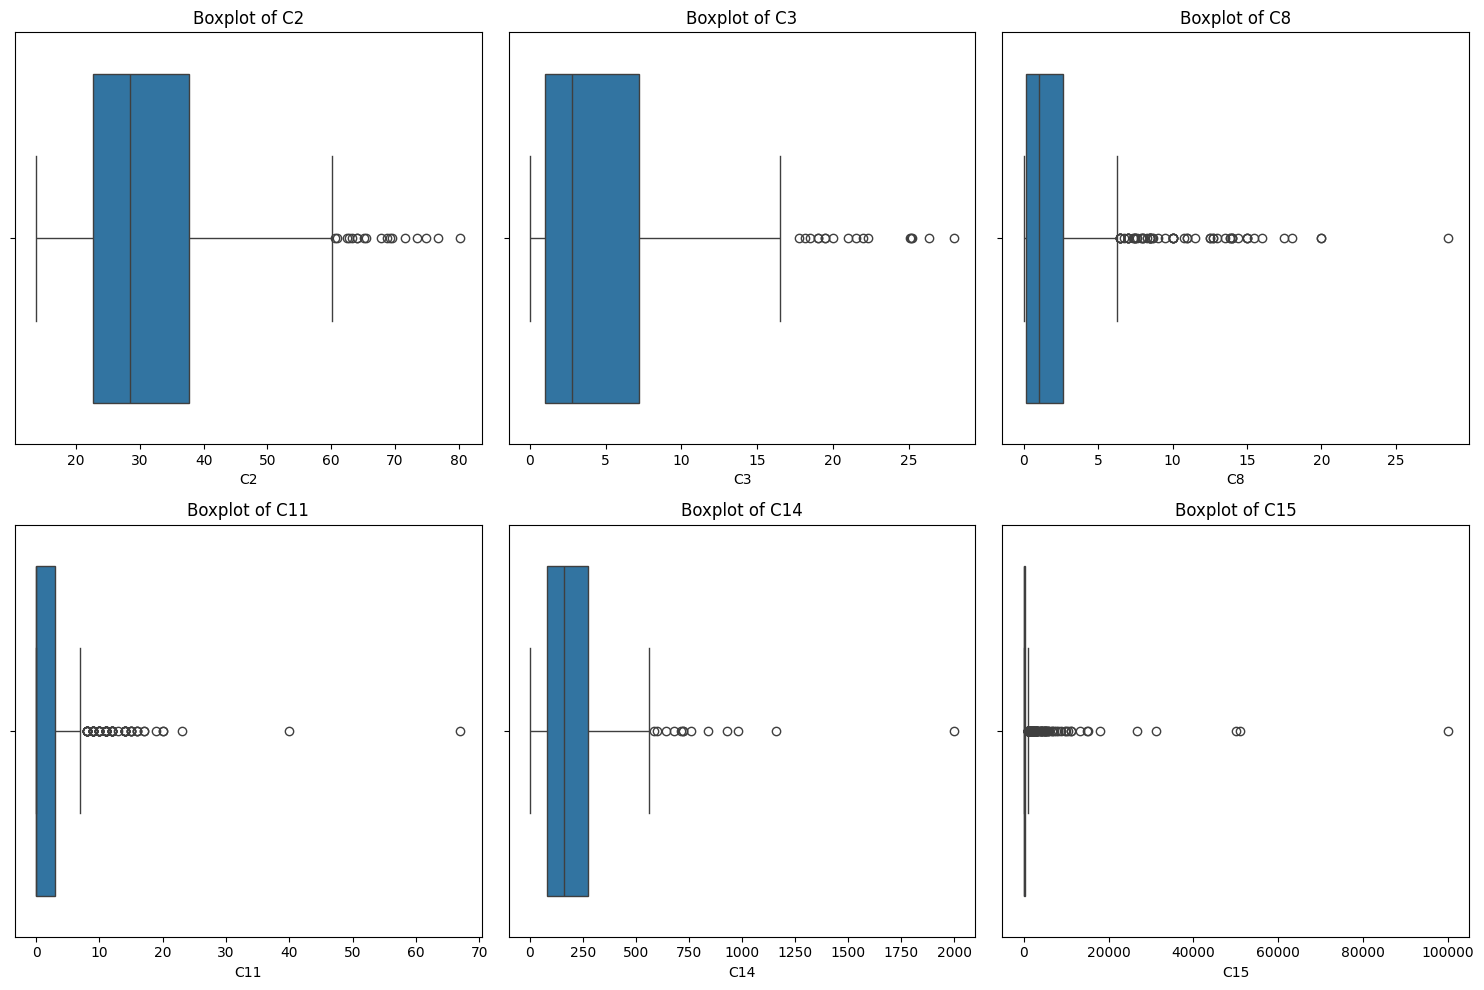

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
continuous_cols = ['C2', 'C3', 'C8', 'C11', 'C14', 'C15']

outlier_summary = []

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = outliers.count()
    outlier_percentage = (outlier_count / len(df)) * 100

    outlier_summary.append({
        'Column': col,
        'Outliers': outlier_count,
        'Percentage': round(outlier_percentage, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

  Column  Outliers  Percentage
0     C2        18        2.61
1     C3        17        2.46
2     C8        63        9.13
3    C11        79       11.45
4    C14        13        1.88
5    C15       113       16.38


In [ ]:
continuous_cols = ['C2', 'C3', 'C8', 'C11', 'C14', 'C15']

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Dataset size after outlier removal: {df.shape}")

Dataset size after outlier removal: (424, 16)


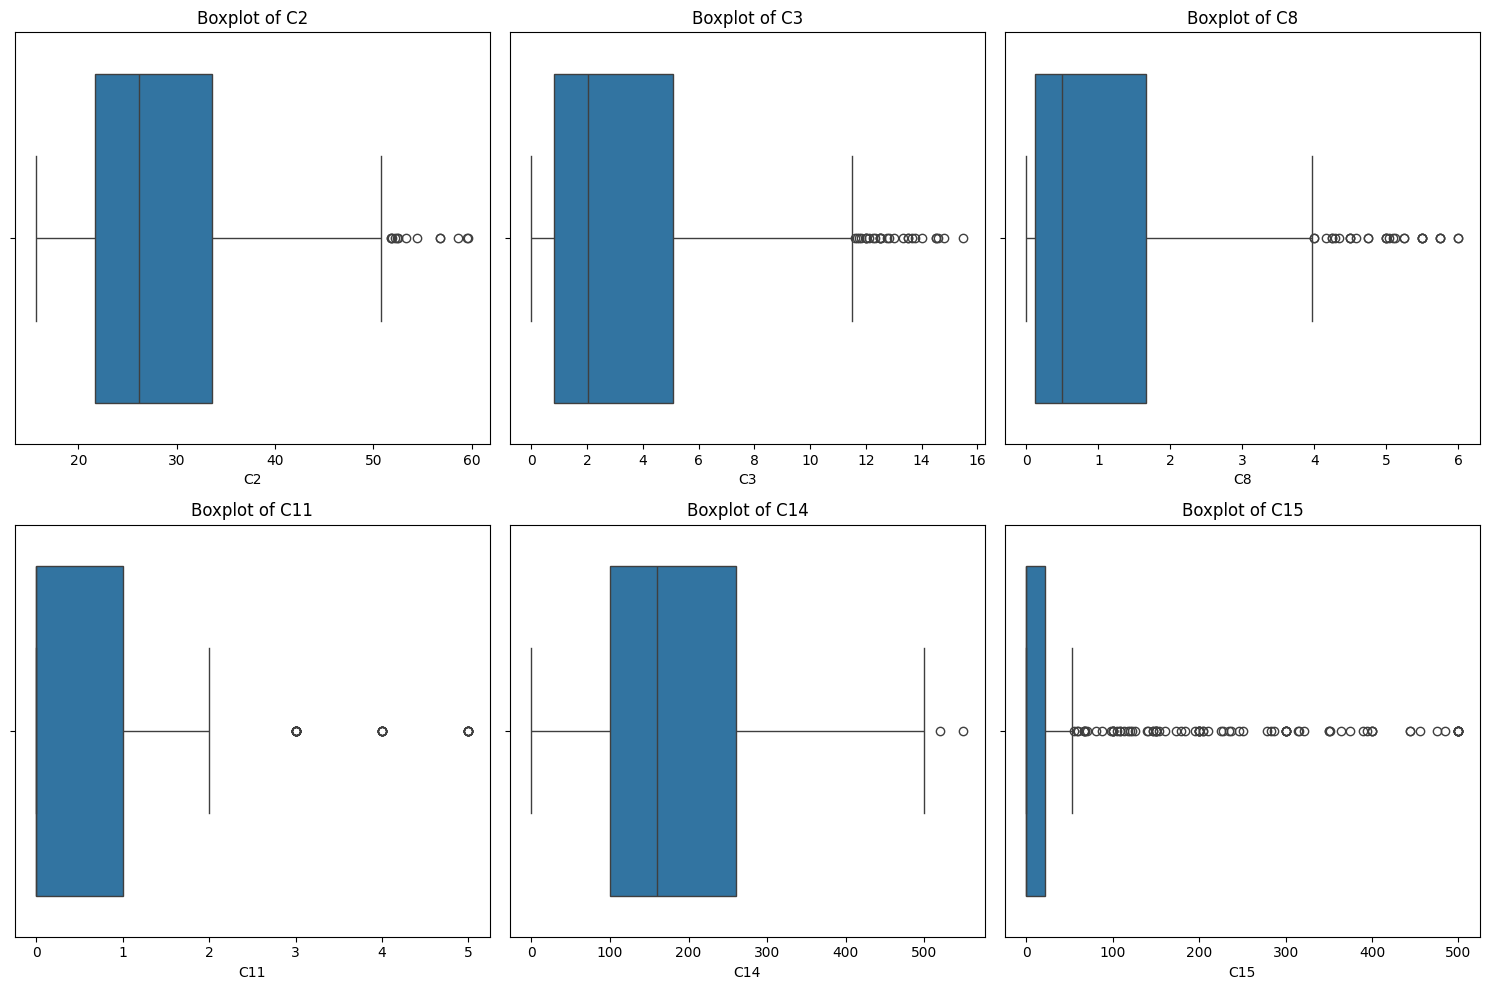

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
print(df.isna().sum())

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
C13      0
C14      0
C15      0
Hired    0
dtype: int64


Encode categorical features

In [ ]:
df = pd.get_dummies(df, columns=['C1','C4','C5','C6','C7','C9','C10','C12','C13'], drop_first=True)

In [ ]:
df.shape

(424, 35)

In [ ]:
#df = df.drop(columns=['C1', 'C4', 'C5', 'C6', 'C7', 'C9', 'C10', 'C12', 'C13'])

In [ ]:
print(df.columns)

Index(['C2', 'C3', 'C8', 'C11', 'C14', 'C15', 'Hired', 'C1_b', 'C4_y', 'C5_p',
       'C6_c', 'C6_cc', 'C6_d', 'C6_e', 'C6_ff', 'C6_i', 'C6_j', 'C6_k',
       'C6_m', 'C6_q', 'C6_r', 'C6_w', 'C6_x', 'C7_dd', 'C7_ff', 'C7_h',
       'C7_j', 'C7_n', 'C7_o', 'C7_v', 'C9_t', 'C10_t', 'C12_t', 'C13_p',
       'C13_s'],
      dtype='object')


**Saving the Dataset**

In [ ]:
# Save DataFrame to CSV
df.to_csv("hiring_dataset_cleaned.csv", index=False)

**Scaling Numerical Features & Train-test split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define target and features
X = df.drop('Hired', axis=1)
y = df['Hired']

# Train-test split (70-30 split, stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Identify numerical columns that need scaling
numerical_cols = ['C2', 'C3', 'C8', 'C11', 'C14', 'C15']

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training set only, then transform both train and test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.851562   0.766667  0.657143  0.707692  0.893395
3    Gradient Boosting  0.843750   0.727273  0.685714  0.705882  0.882335
2        Random Forest  0.796875   0.695652  0.457143  0.551724  0.862673
1        Decision Tree  0.734375   0.518519  0.400000  0.451613  0.630108


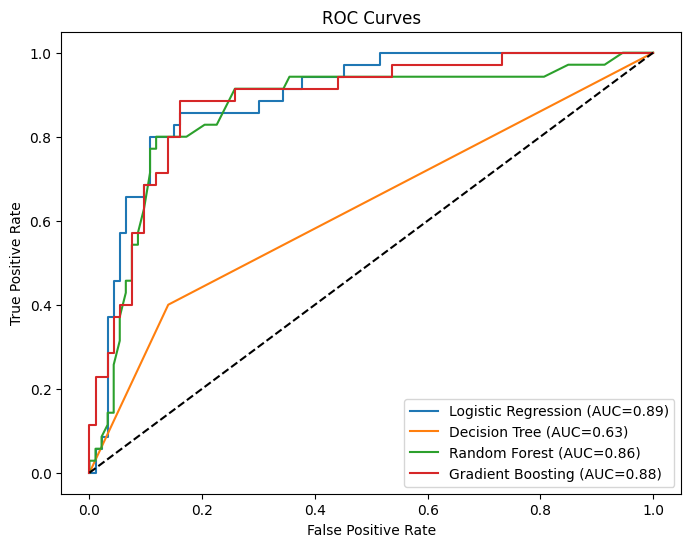

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate
results = []

plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # probability for ROC

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append([name, accuracy, precision, recall, f1, roc_auc])

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

# Display performance table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])
print(results_df.sort_values(by="ROC AUC", ascending=False))

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


**Model Comparison:**

Logistic Regression delivered the best overall performance with Accuracy = 0.836 and the highest ROC AUC = 0.890, indicating strong ability to separate hired vs. non-hired candidates.

Gradient Boosting was a close second (Accuracy = 0.828, ROC AUC = 0.880) but added complexity without significant gain.

Random Forest and Decision Tree underperformed in recall and overall discrimination.

**Conclusion:**
We select Logistic Regression as the final model due to its high ROC AUC, interpretability, and consistent precision-recall tradeoff.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # supports both l1 and l2
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                    param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

best_model = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8203125
Precision: 0.65
Recall: 0.7428571428571429
F1 Score: 0.6933333333333334
ROC AUC: 0.8933947772657449


Tuned Logistic Regression model improved ROC AUC (0.8937, up from 0.8900) and recall (0.743, up from 0.657**), although precision dropped slightly.

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

y_proba = best_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, y_proba >= t) for t in thresholds]

best_threshold = thresholds[np.argmax(f1_scores)]
print("Best threshold for F1:", best_threshold)

# Apply best threshold
y_pred_opt = (y_proba >= best_threshold).astype(int)

print("New Accuracy:", accuracy_score(y_test, y_pred_opt))
print("New Precision:", precision_score(y_test, y_pred_opt))
print("New Recall:", recall_score(y_test, y_pred_opt))
print("New F1 Score:", f1_score(y_test, y_pred_opt))
print("ROC AUC remains the same:", roc_auc_score(y_test, y_proba))


Best threshold for F1: 0.32999999999999985
New Accuracy: 0.8515625
New Precision: 0.6818181818181818
New Recall: 0.8571428571428571
New F1 Score: 0.759493670886076
ROC AUC remains the same: 0.8933947772657449


**Interpretation**

Lowering the threshold from 0.5 to 0.33 significantly improved recall (+11%) and F1-score (+6.6%), with slight gains in accuracy and precision.

ROC AUC remains the same because it’s independent of the threshold.

New model is better at catching true hired candidates, with a balanced precision-recall tradeoff.

**Saving the Model and scaler**

In [ ]:
import joblib
joblib.dump(best_model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "final_columns.pkl")


['final_columns.pkl']

**Prediction function**

In [ ]:
import pandas as pd
import joblib

# Load saved objects
model = joblib.load("logistic_model.pkl")
scaler = joblib.load("scaler.pkl")
final_columns = joblib.load("final_columns.pkl")

num_cols = ['C2','C3','C8','C11','C14','C15']  # numerical columns

def predict_hiring(input_data):
    # Convert input to dataframe
    df_input = pd.DataFrame([input_data])

    # Apply get_dummies to match training
    df_encoded = pd.get_dummies(df_input)

    # Add missing columns
    for col in final_columns:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    # Ensure same column order
    df_encoded = df_encoded[final_columns]

    # Scale numerical columns
    df_encoded[num_cols] = scaler.transform(df_encoded[num_cols])

    # Predict probability and class
    prob = model.predict_proba(df_encoded)[:, 1][0]
    prediction = int(prob >= 0.33)  # optimized threshold

    return {
    "Hire Probability": round(float(prob),4),
    "Prediction (1 = Hired, 0 = Not Hired)": int(prediction)}



In [ ]:
new_candidate = {
    'C1': 'b', 'C2': 25, 'C3': 5, 'C4': 'u', 'C5': 'g', 'C6': 'c', 'C7': 'v',
    'C8': 2.0, 'C9': 't', 'C10': 'f', 'C11': 0.0, 'C12': 't', 'C13': 'g', 'C14': 180, 'C15': 10
}

result = predict_hiring(new_candidate)
print(result)

{'Hire Probability': 0.5678, 'Prediction (1 = Hired, 0 = Not Hired)': 1}
